In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-q7uezuji
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-q7uezuji
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4304 sha256=56c457b3f812822713f37f29e4fa7a702dbd33d040fab9e9494e5e75a13337a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-l0nokktn/wheels/f3/08/cc/e2b5b0e1c92df07dbb50a6f024a68ce090f5e7b2316b41756d
Successfully built NVCCPlugin


In [3]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


Metoda Prostokątów CPU:

Program ten oblicza całkę funkcji "f1(x) = x^2 + x + 10" przy użyciu metody prostokątów w zakresie wartości od "xp" do "xk" przy użyciu "n" prostokątów. Kod również mierzy czas wykonania tego obliczenia

In [8]:
%%cu
#include <math.h>
#include <chrono>
#include <iostream> 
#include <sys/time.h>
#include <stdio.h>

double f1(double x) { return x * x + x + 10; }

double metoda_prostokatow(int n, float xp, float xk) {
    float calka = 0;
    float h = (xk - xp) / (float)n;
    int i = 1;

    for (i = 1; i <= n; i++) {
        calka += f1(xp + i*h)*h;
    }

    return calka; 
}


int main() {
    float xp, xk;
    int n = 1000;
    int k;

    // przedzialy
    xp = 1;
    xk = 10000000;

  //printf("n = %d | xp = %d | xk = %d\n",n ,xp, xk);
for(k = 0; k < 5; k++) {
    n *= 10;
printf("n = %d\n",n);


  float w1;
    struct timeval begin, end;
    gettimeofday(&begin, 0);

  w1 = metoda_prostokatow(n, xp, xk);

    gettimeofday(&end, 0);
    long seconds = end.tv_sec - begin.tv_sec;
    long microseconds = end.tv_usec - begin.tv_usec;
    double elapsed = seconds + microseconds*1e-6;

  printf("metoda prostokatow wynik = %.2f\n",w1);
  printf("metoda prostokatow czas = %.8f\n",elapsed);

}
}

n = 10000
metoda prostokatow czas = 0.00016000
n = 100000
metoda prostokatow czas = 0.00157300
n = 1000000
metoda prostokatow czas = 0.01612900
n = 10000000
metoda prostokatow czas = 0.16123200
n = 100000000
metoda prostokatow czas = 1.57199900



Metoda Trapezów CPU:

Program ten to program który liczy całkę numeryczną dla funkcji f(x) = x^2 + x + 10 przy użyciu metody trapezów. W programie zdefiniowano funkcję metoda_trapezow, która przyjmuje trzy argumenty: liczbę przedziałów rozkładu (n), punkt startowy (xp) i punkt końcowy (xk). Wewnątrz tej funkcji zastosowano pętlę, która iteruje przez liczbę przedziałów i wykorzystuje wartości tych przedziałów do obliczenia całki numerycznej. Wynik całki numerycznej jest zwracany przez funkcję. W głównej funkcji programu zdefiniowano zmienne xp i xk jako punkty startowe i końcowe oraz zmienną n jako liczbę przedziałów. W pętli for następuje powiększanie liczby przedziałów oraz wywołanie funkcji metoda_trapezow i mierzenie czasu. Wynik całki numerycznej oraz czas obliczeń są wyświetlane na ekranie.

In [12]:
%%cu
#include <math.h>
#include <chrono>
#include <iostream> 
#include <sys/time.h>
#include <stdio.h>

double f1(double x) { return x * x + x + 10; }



double metoda_trapezow(int n, float xp, float xk) {
    float calka = 0;
    float h = (xk - xp) / (float)n;
    int i = 1;

    for (i = 1; i < n; i++) {
        calka += f1(xp + i * h);
    }
    calka += f1(xp) / 2;
    calka += f1(xk) / 2;
    calka *= h;

    return calka;
}



int main() {
    float xp, xk;
    int n = 1000;
    int k;

    // przedzialy
    xp = 1;
    xk = 10000000;

  //printf("n = %d | xp = %d | xk = %d\n",n ,xp, xk);
for(k = 0; k < 5; k++) {
    n *= 10;
printf("n = %d\n",n);




  float w2;
  struct timeval begin2, end2;
    gettimeofday(&begin2, 0);

  w2 = metoda_trapezow(n, xp, xk);

  gettimeofday(&end2, 0);
    long seconds2 = end2.tv_sec - begin2.tv_sec;
    long microseconds2 = end2.tv_usec - begin2.tv_usec;
    double elapsed = seconds2 + microseconds2*1e-6;
  printf("metoda trapezow wynik = %.2f\n",w2);
  printf("metoda trapezow czas = %.8f\n",elapsed);
  



}


}

n = 10000
metoda trapezow wynik = 333333011626152951808.00
metoda trapezow czas = 0.00013300
n = 100000
metoda trapezow wynik = 333333996788571439104.00
metoda trapezow czas = 0.00136100
n = 1000000
metoda trapezow wynik = 333324989589316698112.00
metoda trapezow czas = 0.01410000
n = 10000000
metoda trapezow wynik = 336984445761531936768.00
metoda trapezow czas = 0.13839500
n = 100000000
metoda trapezow wynik = 236118292477547380736.00
metoda trapezow czas = 1.38076100



Metoda Simpsona CPU:

Jest to programem napisanym w języku C++, który liczy całkę funkcji f(x) = x^2 + x + 10 na przedziale od 1 do 10000000 przy użyciu metody Simpsona. Wartość całki jest obliczana poprzez iterowanie po przedziale z krokiem h (w zależności od liczby podprzedziałów n) i sumowanie wartości funkcji f(x) na krańcach przedziału oraz w połowie przedziału. Program mierzy również czas wykonania obliczeń dla różnych wartości n (1000, 10000, 100000 itd.) i wyświetla wynik oraz czas wykonania.

In [13]:
%%cu
#include <math.h>
#include <chrono>
#include <iostream> 
#include <sys/time.h>
#include <stdio.h>

double f1(double x) { return x * x + x + 10; }




double metoda_simpsona(int n, float xp, float xk) {
    float calka = 0;
    float h = (xk - xp) / (float)n;
    float s = 0;
    float x;
    int i = 1;
    
    for (i = 1; i < n; i++) {
      x = xp + i * h;
      s += f1(x - h / 2);
      calka += f1(x);
    }
    s += f1(xk - h / 2);
    calka = (h / 6) * (f1(xp) + f1(xk) + 2 * calka + 4 * s);

    return calka;
}

int main() {
    float xp, xk;
    int n = 1000;
    int k;

    // przedzialy
    xp = 1;
    xk = 10000000;

  //printf("n = %d | xp = %d | xk = %d\n",n ,xp, xk);
for(k = 0; k < 5; k++) {
    n *= 10;
printf("n = %d\n",n);




  float w3;
  struct timeval begin3, end3;
    gettimeofday(&begin3, 0);

  w3 = metoda_simpsona(n, xp, xk);

  gettimeofday(&end3, 0);
    long seconds3 = end3.tv_sec - begin3.tv_sec;
    long microseconds3 = end3.tv_usec - begin3.tv_usec;
    double elapsed3 = seconds3 + microseconds3*1e-6;
  printf("metoda simpsona wynik = %.2f\n",w3);
  printf("metoda simpsona czas = %.8f\n",elapsed3);

}


}

n = 10000
metoda simpsona wynik = 333333715313594728448.00
metoda simpsona czas = 0.00026000
n = 100000
metoda simpsona wynik = 333333891235455172608.00
metoda simpsona czas = 0.00269600
n = 1000000
metoda simpsona wynik = 333324989589316698112.00
metoda simpsona czas = 0.02639300
n = 10000000
metoda simpsona wynik = 336984445761531936768.00
metoda simpsona czas = 0.26272100
n = 100000000
metoda simpsona wynik = 236118292477547380736.00
metoda simpsona czas = 2.71224200



Metoda Prostokątów GPU:

Program jest w języku C++, który implementuje metodę numerycznej całkowania zwaną metodą prostokątów z wykorzystaniem CUDA. Program oblicza całkę określoną danej funkcji (w tym przypadku f(x) = x^2 + x + 10) na danym przedziale za pomocą metody prostokątów. Funkcja jest najpierw zdefiniowana w pamięci hosta, a następnie skopiowana do pamięci urządzenia. Funkcja jądra "watek_prostokaty" jest zdefiniowana i uruchomiona, aby obliczyć całkę określoną funkcji na pamięci urządzenia. Wynik jest następnie skopiowany z powrotem do pamięci hosta i zwracany jako końcowy wynik. Program mierzy również czas potrzebny do wykonania obliczeń.

In [24]:
%%cu
#include <sys/time.h>
#include <stdio.h>
#include <chrono>
#include <iostream>
#include <math.h>
using namespace std;

// funkcja obliczająca wartość f(x) = x^2 + x + 10 w pamięci urządzenia
__device__ float fg(float x) { return x * x + x + 10; }

__global__ void watek_prostokaty( float xp, float h, int n, float* tab) {
    
  int tid = blockIdx.x + 1;

      if(tid < n){
      
//oblicza pole prostokąta i zapisuje je w tablicy
      tab[tid - 1] = fg(xp + tid * h) * h;
      }

  
}

float f1(float x) { return x * x + x + 10; }

float metoda_prostokatow( float xp, float xk, int n) {
    
// funkcja do obliczania powierzchni metodą prostokąta
    size_t size = n * sizeof(float);                      // oblicz rozmiar tablicy typu float

    float* dev;                                           // tworzy wskaźnik zmiennoprzecinkowy dla pamięci urządzenia
    float* host = (float*)malloc(size);                   // tworzy wskaźnik zmiennoprzecinkowy i przydziela pamięć w pamięci hosta
    

    float suma = 0;
    cudaMalloc((void**) &dev,size);
    float h = (xk - xp) / (float)n;
    
    watek_prostokaty<<<n,1>>> (xp, h, n, dev);
    cudaMemcpy(host, dev, sizeof(float) * n, cudaMemcpyDeviceToHost);
    for(int i = 0; i < n; i++){
        suma += host[i];
    }
    free(host);
    cudaFree(dev);


    return suma;

}

int main() {
    
    float xp, xk;
    int n = 10000, n2 = 100000, n3 = 1000000, n4 = 10000000, n5 = 100000000;
    int k;

    // przedzialy
    xp = 1;
    xk = 10000000;

    //printf("n = %d\n",n);
        cout<<"n = "<<n<<endl;
        auto start1 = chrono::steady_clock::now();
        float w1 = metoda_prostokatow(xp, xk, n);
        auto end1 = chrono::steady_clock::now();
        auto diff1 = end1 - start1;
        printf("metoda prostokatow wynik = %.2f\n",w1);
        cout<<"metoda prostokatow czas = "<<(chrono::duration <double, milli> (diff1).count()) / 1000<<endl;

        cout<<"n = "<<n2<<endl;
        auto start2 = chrono::steady_clock::now();
        float w2 = metoda_prostokatow(xp, xk, n2);
        auto end2 = chrono::steady_clock::now();
        auto diff2 = end2 - start2;
        printf("metoda prostokatow wynik = %.2f\n",w2);
        cout<<"metoda prostokatow czas = "<<(chrono::duration <double, milli> (diff2).count()) / 1000<<endl;

        cout<<"n = "<<n3<<endl;
        auto start3 = chrono::steady_clock::now();
        float w3 = metoda_prostokatow(xp, xk, n);
        auto end3 = chrono::steady_clock::now();
        auto diff3 = end3 - start3;
        printf("metoda prostokatow wynik = %.2f\n",w3);
        cout<<"metoda prostokatow czas = "<<(chrono::duration <double, milli> (diff3).count()) / 1000<<endl;

        cout<<"n = "<<n4<<endl;
        auto start4 = chrono::steady_clock::now();
        float w4 = metoda_prostokatow(xp, xk, n);
        auto end4 = chrono::steady_clock::now();
        auto diff4 = end4 - start4;
        printf("metoda prostokatow wynik = %.2f\n",w4);
        cout<<"metoda prostokatow czas = "<<(chrono::duration <double, milli> (diff4).count()) / 1000<<endl;

        cout<<"n = "<<n5<<endl;
        auto start5 = chrono::steady_clock::now();
        float w5 = metoda_prostokatow(xp, xk, n5);
        auto end5 = chrono::steady_clock::now();
        auto diff5 = end5 - start5;
        printf("metoda prostokatow wynik = %.2f\n",w5);
        cout<<"metoda prostokatow czas = "<<(chrono::duration <double, milli> (diff5).count()) / 1000<<endl;
    return 0;
}

n = 10000
metoda prostokatow wynik = 333283260924019343360.00
metoda prostokatow czas = 0.245098
n = 100000
metoda prostokatow wynik = 333328226551548870656.00
metoda prostokatow czas = 0.000989215
n = 1000000
metoda prostokatow wynik = 333283260924019343360.00
metoda prostokatow czas = 0.000278742
n = 10000000
metoda prostokatow wynik = 333283260924019343360.00
metoda prostokatow czas = 0.000272243
n = 100000000
metoda prostokatow wynik = 256865408390610812928.00
metoda prostokatow czas = 0.772253



Metoda Trapezów GPU:

Program jest w języku C++, który implementuje metodę numerycznej całkowania zwaną metodą trapezów z wykorzystaniem CUDA. Program oblicza całkę określoną danej funkcji (w tym przypadku f(x) = x^2 + x + 10) na danym przedziale za pomocą metody trapezów. Funkcja jest najpierw zdefiniowana w pamięci hosta, a następnie skopiowana do pamięci urządzenia. Funkcja jądra "watek_trapezy" jest zdefiniowana i uruchomiona, aby obliczyć całkę określoną funkcji na pamięci urządzenia. Wynik jest następnie skopiowany z powrotem do pamięci hosta i zwracany jako końcowy wynik. Program mierzy również czas potrzebny do wykonania obliczeń.

In [21]:
%%cu
#include <sys/time.h>
#include <stdio.h>
#include <chrono>
#include <iostream>
#include <math.h>
using namespace std;

// funkcja obliczająca wartość f(x) = x^2 + x + 10 w pamięci urządzenia
__device__ float fg(float x) { return x * x + x + 10; }


// funkcja jądra do obliczania pola metodą trapezów
__global__ void watek_trapezy( float xp, float h, int n, float* tab) {
    
		int tid = blockIdx.x + 1;

      if(tid < n){
//oblicza wysokość trapezu i zapisuje ją w tablicy
      tab[tid-1] = fg(xp + tid * h);
      }
  
}



 float f1(float x) { return x * x + x + 10; }

float metoda_trapezow( float xp, float xk, int n) {
    
    //cudaError_t status;
    size_t size = n * sizeof(float);

    float* dev;
    float* host = (float*)malloc(size);
    

    float suma = 0;
    cudaMalloc((void**) &dev,size);
    float h = (xk - xp) / (float)n;
    
    watek_trapezy<<<n,1>>> (xp, h, n, dev);
    cudaMemcpy(host, dev, sizeof(float) * n, cudaMemcpyDeviceToHost);
    
    for(int i = 0; i < n; i++){
        suma += host[i];
    }
    
    free(host);
    cudaFree(dev);

    return h*((f1(xp) / 2) + suma + (f1(xk) / 2));

}

int main() {
    
    float xp, xk;
    int n = 10000, n2 = 100000, n3 = 1000000, n4 = 10000000, n5 = 100000000;
    int k;

    // przedzialy
    xp = 1;
    xk = 10000000;

    //printf("n = %d\n",n);

    cout<<"n = "<<n<<endl;
        auto start1 = chrono::steady_clock::now();
        float w1 = metoda_trapezow(xp, xk, n);
        auto end1 = chrono::steady_clock::now();
        auto diff1 = end1 - start1;
        printf("metoda trapezow wynik = %.2f\n",w1);
        cout<<"metoda trapezow czas = "<<(chrono::duration <double, milli> (diff1).count()) / 1000<<endl;

        cout<<"n = "<<n2<<endl;
        auto start2 = chrono::steady_clock::now();
        float w2 = metoda_trapezow(xp, xk, n2);
        auto end2 = chrono::steady_clock::now();
        auto diff2 = end2 - start2;
        printf("metoda trapezow wynik = %.2f\n",w2);
        cout<<"metoda trapezow czas = "<<(chrono::duration <double, milli> (diff2).count()) / 1000<<endl;

        cout<<"n = "<<n3<<endl;
        auto start3 = chrono::steady_clock::now();
        float w3 = metoda_trapezow(xp, xk, n3);
        auto end3 = chrono::steady_clock::now();
        auto diff3 = end3 - start3;
        printf("metoda trapezow wynik = %.2f\n",w3);
        cout<<"metoda trapezow czas = "<<(chrono::duration <double, milli> (diff3).count()) / 1000<<endl;

        cout<<"n = "<<n4<<endl;
        auto start4 = chrono::steady_clock::now();
        float w4 = metoda_trapezow(xp, xk, n4);
        auto end4 = chrono::steady_clock::now();
        auto diff4 = end4 - start4;
        printf("metoda trapezow wynik = %.2f\n",w4);
        cout<<"metoda trapezow czas = "<<(chrono::duration <double, milli> (diff4).count()) / 1000<<endl;

        cout<<"n = "<<n5<<endl;
        auto start5 = chrono::steady_clock::now();
        float w5 = metoda_trapezow(xp, xk, n5);
        auto end5 = chrono::steady_clock::now();
        auto diff5 = end5 - start5;
        printf("metoda trapezow wynik = %.2f\n",w5);
        cout<<"metoda trapezow czas = "<<(chrono::duration <double, milli> (diff5).count()) / 1000<<endl;
    return 0;
}

n = 10000
metoda trapezow wynik = 333333011626152951808.00
metoda trapezow czas = 0.21973
n = 100000
metoda trapezow wynik = 333333996788571439104.00
metoda trapezow czas = 0.00108517
n = 1000000
metoda trapezow wynik = 333324989589316698112.00
metoda trapezow czas = 0.00704284
n = 10000000
metoda trapezow wynik = 336984410577159847936.00
metoda trapezow czas = 0.0773815
n = 100000000
metoda trapezow wynik = 236118292477547380736.00
metoda trapezow czas = 0.784583



Metoda Simpsona GPU:

Program jest w języku C++, który implementuje metodę numerycznej całkowania zwaną regułą Simpsona z wykorzystaniem CUDA. Program oblicza całkę określoną danej funkcji (w tym przypadku f(x) = x^2 + x + 10) na danym przedziale za pomocą reguły Simpsona. Funkcja jest najpierw zdefiniowana w pamięci hosta, a następnie skopiowana do pamięci urządzenia. Funkcja jądra "watek_simpson" jest zdefiniowana i uruchomiona, aby obliczyć całkę określoną funkcji na pamięci urządzenia. Wynik jest następnie skopiowany z powrotem do pamięci hosta i zwracany jako końcowy wynik. Program mierzy również czas potrzebny do wykonania obliczeń.

In [44]:
%%cu
#include <sys/time.h>
#include <stdio.h>
#include <chrono>
#include <iostream>
#include <math.h>
using namespace std;

// funkcja obliczająca wartość f(x) = x^2 + x + 10 w pamięci urządzenia
__device__ float fg(float x) { return x * x + x + 10; }


// funkcja jądra do obliczania powierzchni metodą simpsona
__global__ void watek_simpson( float xp, float h, int n, float* tab, float* tab2 ) {
    
		int tid = blockIdx.x + 1;
  
      if(tid < n + 1){
		tab2[tid - 1] = xp + tid * h;
		tab[tid - 1] = fg(xp + tid * h);
      }
  
}


 float f1(float x) { return x * x + x + 10; }



float metoda_simpsona( float xp, float xk, int n) {
    
    //cudaError_t status;
    size_t size = n * sizeof(float);

    float* dev;
    float* host = (float*)malloc(size);
    float* dev2;
    float* host2 = (float*)malloc(size);
    

    
    float suma1 = 0 ,suma2 = 0;
    float t[n];
    cudaMalloc((void**) &dev,size);
    cudaMalloc((void**) &dev2,size);
    float h = (xk - xp) / (float)n;
    
    watek_simpson<<<n,1>>> (xp, h, n, dev, dev2);
    cudaMemcpy(host, dev, sizeof(float)*n, cudaMemcpyDeviceToHost);
    cudaMemcpy(host2, dev2, sizeof(float)*n, cudaMemcpyDeviceToHost);
    
    for(int i = 0; i < n; i++){
        t[i] = f1((host2[i + 1] +host2[i]) / 2);
    }

    for(int i = 0 ; i < n; i++){
            suma1 += t[i];
        }

    suma1 *= 4;
    for(int i = 1 ; i < n; i++){
        suma2 += host[i];
    }

    suma2 *= 2;
    free(host);
    cudaFree(dev);
    free(host2);
    cudaFree(dev2);
    
    return (f1(xp) + host[n] + suma1 + suma2) * (h / 6);

}

int main() {
    
    float xp, xk;
    int n = 10000, n2 = 100000, n3 = 1000000, n4 = 10000000, n5 = 100000000;
    int k;

    // przedzialy
    xp = 1;
    xk = 10000000;

    //printf("n = %d\n",n);
    cout<<"n = "<<n<<endl;
        auto start1 = chrono::steady_clock::now();
        float w1 = metoda_simpsona(xp, xk, n);
        auto end1 = chrono::steady_clock::now();
        auto diff1 = end1 - start1;
        printf("metoda simpsona wynik = %.2f\n",w1);
        cout<<"metoda simpsona czas = "<<(chrono::duration <double, milli> (diff1).count()) / 1000<<endl;

        cout<<"n = "<<n2<<endl;
        auto start2 = chrono::steady_clock::now();
        float w2 = metoda_simpsona(xp, xk, n2);
        auto end2 = chrono::steady_clock::now();
        auto diff2 = end2 - start2;
        printf("metoda simpsona wynik = %.2f\n",w2);
        cout<<"metoda simpsona czas = "<<(chrono::duration <double, milli> (diff2).count()) / 1000<<endl;

        cout<<"n = "<<n3<<endl;
        auto start3 = chrono::steady_clock::now();
        float w3 = metoda_simpsona(xp, xk, n3);
        auto end3 = chrono::steady_clock::now();
        auto diff3 = end3 - start3;
        printf("metoda simpsona wynik = %.2f\n",w3);
        cout<<"metoda simpsona czas = "<<(chrono::duration <double, milli> (diff3).count()) / 1000<<endl;

        cout<<"n = "<<n4<<endl;
        auto start4 = chrono::steady_clock::now();
        float w4 = metoda_simpsona(xp, xk, n4);
        auto end4 = chrono::steady_clock::now();
        auto diff4 = end4 - start4;
        printf("metoda simpsona wynik = %.2f\n",w4);
        cout<<"metoda simpsona czas = "<<(chrono::duration <double, milli> (diff4).count()) / 1000<<endl;

        cout<<"n = "<<n5<<endl;
        auto start5 = chrono::steady_clock::now();
        float w5 = metoda_simpsona(xp, xk, n5);
        auto end5 = chrono::steady_clock::now();
        auto diff5 = end5 - start5;
        printf("metoda simpsona wynik = %.2f\n",w5);
        cout<<"metoda simpsona czas = "<<(chrono::duration <double, milli> (diff5).count()) / 1000<<endl;
    return 0;
}

n = 10000
metoda simpsona wynik = 333367070098334941184.00
metoda simpsona czas = 0.2228
n = 100000
metoda simpsona wynik = 333337233750803611648.00
metoda simpsona czas = 0.0022849
n = 1000000
metoda simpsona wynik = 333325306248665497600.00
metoda simpsona czas = 0.0183042
n = 10000000



Graf przedstawiający czasy obliczeń dla coraz większej wartości N dla poszczegulnych metod

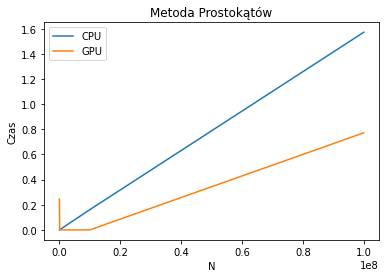

In [37]:
import matplotlib.pyplot as plt
 
x  = [10000, 100000, 1000000, 10000000, 100000000]
y1 = [0.00016000, 0.00157300, 0.01612900, 0.16123200, 1.57199900]
y2 = [0.245098, 0.000989215, 0.000278742, 0.000272243, 0.772253]
plt.plot(x, y1, label="CPU")
plt.plot(x, y2, label="GPU")
plt.plot()

plt.xlabel("N")
plt.ylabel("Czas")
plt.title("Metoda Prostokątów")
plt.legend()
plt.show()

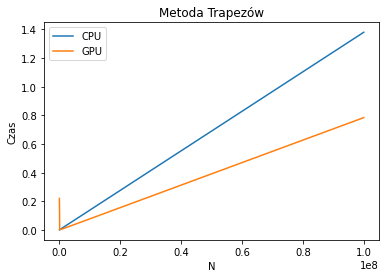

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x  = [10000, 100000, 1000000, 10000000, 100000000]
y1 = [0.00013300, 0.00136100, 0.01410000, 0.13839500, 1.38076100]
y2 = [0.21973, 0.00108517, 0.00704284, 0.0773815, 0.784583]
plt.plot(x, y1, label="CPU")
plt.plot(x, y2, label="GPU")
plt.plot()

plt.xlabel("N")
plt.ylabel("Czas")
plt.title("Metoda Trapezów")
plt.legend()
plt.show()

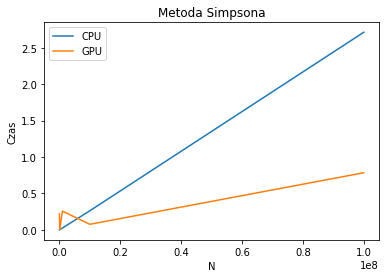

In [49]:
import matplotlib.pyplot as plt



x  = [10000, 100000, 1000000, 10000000, 100000000]
y1 = [0.00026000, 0.00269600, 0.02639300, 0.26272100, 2.71224200]
y2 = [0.219601, 0.00204353, 0.257344, 0.0773815, 0.784583]
plt.plot(x, y1, label="CPU")
plt.plot(x, y2, label="GPU")
plt.plot()

plt.xlabel("N")
plt.ylabel("Czas")
plt.title("Metoda Simpsona")
plt.legend()
plt.show()